<a href="https://colab.research.google.com/github/lkarjun/Data-Science-from-Scratch/blob/master/14%20Simple%20Linear%20Regression/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Linear Regression

In [3]:
def predict(alpha: float, beta: float, x_i: float) -> float:
    return beta * x_i + alpha

In [4]:
def error(alpha: float, beta: float, x_i: float, y_i: float) -> float:
    '''the error from predicting beta * x_i + alpha
    when the actual value is y_i
    '''
    pred = predict(alpha, beta, x_i) - y_i
    return pred

In [5]:
from linearalgebra import Vector
from typing import Tuple
from stati import correlation, standard_deviation, mean

In [6]:
def sum_of_sqerrors(alpha: float, beta: float, x: Vector, y: Vector) -> float:
    return sum(error(alpha, beta, x_i, y_i) ** 2
                for x_i, y_i in zip(x, y))

In [7]:
def least_squares_fit(x: Vector, y: Vector) -> Tuple[float, float]:
    '''Given two vector x and y,
    find the least-square values of alpha and beta'''
    beta = correlation(x, y) * standard_deviation(y) / standard_deviation(x)
    alpha = mean(y) - beta * mean(x)
    return alpha, beta

In [8]:
x = [i for i in range(-100, 110, 10)]
y = [3 * i - 5 for i in  x]

assert least_squares_fit(x, y) == (-5, 3)

In [9]:
age = [1,2,3,4]
weight = [14, 21, 28, 35]
least_squares_fit(age, weight)

(7.0, 7.0)

In [10]:
from stati import num_friends_good, daily_minutes_good
from matplotlib import pyplot as plt
import numpy as np

In [11]:
alpha, beta = least_squares_fit(num_friends_good, daily_minutes_good)
print(alpha, beta)
m, b = np.polyfit(num_friends_good, daily_minutes_good, 1)
print(m, b)
num_friends = np.array(num_friends_good, dtype=float)
daily_mint = np.array(daily_minutes_good, dtype=float)

22.94755241346903 0.903865945605865
0.903865945605871 22.947552413468994


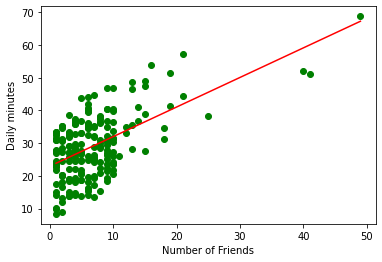

In [12]:
plt.scatter(num_friends_good, daily_minutes_good, color='green')
plt.plot(num_friends_good, m*num_friends + b,  color='red')
plt.xlabel('Number of Friends')
plt.ylabel('Daily minutes')
plt.show()

In [13]:
from stati import de_mean

In [14]:
def total_sum_of_squares(y: Vector) -> float:
    '''the total squared variation of y_i from their mean'''
    return sum(v ** 2 for v in de_mean(y))

In [15]:
def r_squared(alpha: float, beta: float, x: Vector, y: Vector) -> float:
    '''the fraction of variation in y captured by the model,
    which equals
    1 - the fraction of variation in y not captured by the model'''
    return 1.0 - (sum_of_sqerrors(alpha, beta, x, y)/total_sum_of_squares(y))

In [16]:
rsq = r_squared(alpha, beta, num_friends_good, daily_minutes_good)

In [17]:
print(rsq)

0.3291078377836305


# Using Gradient Descent

In [18]:
import random 
import tqdm
from GradientDescent import gradient_step

In [23]:
num_epochs = 10000
random.seed(0)

guess = [random.random(), random.random()]
learning_rate = 1e-6
with tqdm.trange(num_epochs) as t:
    for _ in t:
        alpha, beta = guess
        # print('alpha = ', alpha, 'beta = ', beta)
        # partial derivative of loss with respect to alpha 
        grad_a = sum(2 * error(alpha, beta, x_i, y_i)
                    for x_i, y_i in zip(num_friends_good, daily_minutes_good))

        # partial derivative of loss with respect to beta
        grad_b = sum(2*error(alpha, beta, x_i, y_i) * x_i
                    for x_i, y_i in zip(num_friends_good, daily_minutes_good)) 

        
        # print('grad_a =',grad_a, 'grad_b = ',grad_b)
        # print('__________________________')
        # break
        # compute loss to stick in the tqdm description
        loss = sum_of_sqerrors(alpha, beta, num_friends_good,
                            daily_minutes_good)
        t.set_description(f'loss: {loss:.3f}')
        #finally, update the guess

        guess = gradient_step(guess, [grad_a, grad_b], -learning_rate)

loss: 14348.087: 100%|██████████| 10000/10000 [00:16<00:00, 611.06it/s]


In [26]:
alpha, beta = guess
print(alpha, beta)

19.406454128793584 1.187433471756056
